## 全体の流れ
<ol>
<li>株価データを読み込む</li>
<li>データの全体像をつかむ</li>
<li>特徴量を追加する</li>
<li>学習データと検証データに分割する</li>
<li>データを整える</li>
<li>予測モデルの作成と交差検証</li>
<li>検証データによる予測と精度検証</li>
<li>データ取得期間</li>
    ＊前４年間
<li>計測期間</li>
    ＊20日
<li>基準化の仕方　最も低いところ</li>
    ＊最も低いところ
    ＊最初
    ＊全てやればいい
<li>予測方法</li>
    ＊月次リターンが前月リターンより上昇下落
    ＊平均の騰落率の上昇下落
</ol>

## 株価データを読み込み目的変数を追加する

In [2]:
import pandas as pd
#from pandas_datareader import data as pdr
import numpy as np
import matplotlib.pyplot as plt
#import datetime
#from dtw import dtw
from fastdtw import fastdtw
from scipy.spatial.distance import euclidean
#from dateutil.relativedelta import relativedelta
#from sklearn.preprocessing import MinMaxScaler

In [3]:
df=pd.read_csv("/Users/reiya/Downloads/2012-2020.csv")

In [48]:
#訓練データ
df_train=df[:953]
#検証データ
df_test=df[953:]


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,1.0,0.990969,0.981978,0.985114,0.987187,0.978681,0.988708,0.984576,0.989219,0.996891,1.016797,1.018574,1.019395,1.032854,1.029099,1.024415,1.018870,1.016528,1.020148,1.026191
1,1.0,0.990927,0.994092,0.996183,0.987600,0.997718,0.993549,0.998234,1.005976,1.026063,1.027856,1.028685,1.042267,1.038477,1.033751,1.028155,1.025792,1.029445,1.035544,1.033153
2,1.0,1.003194,1.005304,0.996642,1.006853,1.002645,1.007374,1.015186,1.035458,1.037267,1.038103,1.051809,1.047985,1.043216,1.037569,1.035184,1.038871,1.045025,1.042612,1.055167
3,1.0,1.002104,0.993469,1.003648,0.999454,1.004167,1.011955,1.032162,1.033965,1.034798,1.048461,1.044649,1.039895,1.034266,1.031888,1.035564,1.041698,1.039293,1.051808,1.055798
4,1.0,0.991383,1.001541,0.997355,1.002059,1.009830,1.029994,1.031794,1.032626,1.046260,1.042456,1.037711,1.032094,1.029722,1.033389,1.039511,1.037111,1.049600,1.053581,1.066629
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
929,1.0,0.992982,0.992845,0.984003,0.997515,0.997709,0.998132,0.980124,0.987092,0.976830,0.968641,0.959158,0.964862,0.951393,0.935620,0.959388,0.974327,0.957134,0.953510,0.954955
930,1.0,0.999862,0.990957,1.004565,1.004760,1.005186,0.987051,0.994068,0.983733,0.975487,0.965936,0.971681,0.958117,0.942233,0.966169,0.981212,0.963898,0.960249,0.961704,0.955445
931,1.0,0.991094,1.004704,1.004898,1.005325,0.987187,0.994205,0.983869,0.975622,0.966070,0.971815,0.958249,0.942363,0.966302,0.981348,0.964031,0.960381,0.961836,0.955577,0.959089
932,1.0,1.013732,1.013928,1.014358,0.996058,1.003139,0.992710,0.984389,0.974751,0.980547,0.966860,0.950831,0.974985,0.990166,0.972694,0.969011,0.970479,0.964164,0.967708,0.976675


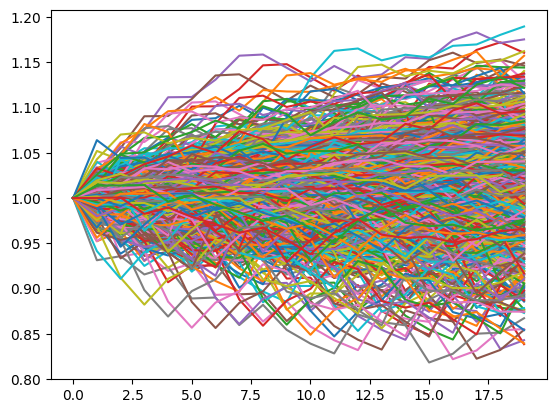

In [51]:
train_data=[]
train_close=[]
train_index=[]

#計測期間
period=20
for i in range(len(df_train)-(period-1)):
    train_data.append(df_train[i:i+period])#20日ごとに分割
    train_close.append(train_data[i]["Close"])
    
    #基準化(最初)
    s=train_close[i][i]
    a=train_close[i]/s

    train_index.append(a.values)
    
    #可視化
    plt.plot(train_index[i])
df_train_index=pd.DataFrame(train_index)
df_train_index

In [52]:
distance=[]
path=[]
for i in range(len(train_index)):
    print(len(train_index)-i)
    for j in range(len(train_index)):
        dist,pa=fastdtw(train_index[i], train_index[j])
        distance.append(dist)
        path.append(pa)
#listの分割　
def split_list(l, n):
    """
    リストをサブリストに分割する
    :param l: リスト
    :param n: サブリストの要素数
    :return: 
    """
    for i in range(0, len(l), n):
        yield l[i:i + n]
 
result = list(split_list(distance, len(train_index)))
#DTW行列
c=np.array(result)
#df_c=pd.DataFrame(c)
#df_c.to_csv("train_data.csv",encoding="shift_jis")

934
933
932
931
930
929
928
927
926
925
924
923
922
921
920
919
918
917
916
915
914
913
912
911
910
909
908
907
906
905
904
903
902
901
900
899
898
897
896
895
894
893
892
891
890
889
888
887
886
885
884
883
882
881
880
879
878
877
876
875
874
873
872
871
870
869
868
867
866
865
864
863
862
861
860
859
858
857
856
855
854
853
852
851
850
849
848
847
846
845
844
843
842
841
840
839
838
837
836
835
834
833
832
831
830
829
828
827
826
825
824
823
822
821
820
819
818
817
816
815
814
813
812
811
810
809
808
807
806
805
804
803
802
801
800
799
798
797
796
795
794
793
792
791
790
789
788
787
786
785
784
783
782
781
780
779
778
777
776
775
774
773
772
771
770
769
768
767
766
765
764
763
762
761
760
759
758
757
756
755
754
753
752
751
750
749
748
747
746
745
744
743
742
741
740
739
738
737
736
735
734
733
732
731
730
729
728
727
726
725
724
723
722
721
720
719
718
717
716
715
714
713
712
711
710
709
708
707
706
705
704
703
702
701
700
699
698
697
696
695
694
693
692
691
690
689
688
687
686
685


In [67]:
from sklearn_extra.cluster import KMedoids
kmedoid=KMedoids(n_clusters=30, metric='euclidean', method='alternate', init='heuristic', max_iter=300, random_state=None).fit(c)
#cluster追加
df_train_index["cluster"]=kmedoid.labels_
df_train_index.groupby('cluster').count().iloc[:,0]

cluster
0       6
1      64
2      63
3      48
4      24
5       8
6      13
7       5
8      17
9      22
10      7
11      2
12     33
13     18
14      7
15     51
16     22
17     79
18     14
19     34
20     85
21      6
22     14
23     17
24     12
25     73
26      9
27     56
28    109
29     16
Name: 0, dtype: int64

In [91]:
#翌月の月末価格の上昇下落ラベル

#月末終値追加
m=[]
for i in range(len(df_train)-(period-1)):
    m.append(train_data[i]["Close"].tail(1).item())
df_train_index["month_close"]=m
#目的変数Upを追加する(翌日の月末が上がる場合1、それ以外は0とする)
df_train_index['Up']=df_train_index['cluster']
for i in range(len(df_train_index['month_close'])-1):
    if df_train_index['month_close'][i] < df_train_index['month_close'][i+1]:
        df_train_index['Up'][i]="Up"
    else:
        df_train_index['Up'][i]="Down"
#最後は別途        
#if df_train_index['month_close'].tail(1) < df_train['month_close']:
#    df_train_index['Up'][i]="Up"
#else:
#    df_train_index['Up'][i]="Down"

#df = df.drop('delta_Close', axis=1)
#df_test=df_topix_index[["cluster","month_close","Up"]]

In [ ]:
#月末価格
df_train["Month_Close"]=df_train["Adj Close"]
for i in range(len(df_train)):
    df_train["Month_Close"][i] = df_train["Adj Close"][i][-1]

#上昇下落ラベル付与
df_train["Up"]=df_train["cluster"]
for i in range(len(df_train)-1):
    if df_train["Month_Close"][i]<df_train["Month_Close"][i+1]:
        df_train["Up"][i]="up"
    else:
        df_train["Up"][i]="down"
#最後は個別で
if df_test["Adj Close"][0][-1]>df_train["Month_Close"][-1]:
    df_train["Up"][-1]="up"
else:
    df_train["Up"][-1]="down"


: 

<h1>検証フェーズ</h1>

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,1.0,0.996714,0.986202,0.965734,0.958700,0.928647,0.955235,0.931694,0.928978,0.921003,0.886929,0.862102,0.910258,0.922473,0.901011,0.927819,0.922122,0.948598,0.968867,0.961826
1,1.0,0.989453,0.968918,0.961860,0.931708,0.958384,0.934765,0.932040,0.924039,0.889853,0.864944,0.913259,0.925514,0.903982,0.930877,0.925162,0.951725,0.972061,0.964997,0.934579
2,1.0,0.979246,0.972113,0.941639,0.968600,0.944729,0.941975,0.933888,0.899338,0.874164,0.922994,0.935379,0.913617,0.940800,0.935023,0.961870,0.982423,0.975283,0.944541,0.932814
3,1.0,0.992716,0.961597,0.989129,0.964752,0.961939,0.953681,0.918399,0.892691,0.942556,0.955204,0.932981,0.960739,0.954840,0.982256,1.003244,0.995953,0.964560,0.952584,0.938976
4,1.0,0.968652,0.996386,0.971831,0.968998,0.960679,0.925138,0.899241,0.949472,0.962213,0.939827,0.967789,0.961847,0.989463,1.010606,1.003261,0.971637,0.959574,0.945865,0.953770
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1157,1.0,1.010664,0.992787,1.000402,1.003564,1.004288,1.004678,0.996085,0.994988,1.006647,1.004831,1.008112,1.012927,1.008135,1.010839,1.014092,1.014465,1.012095,0.996295,0.998608
1158,1.0,0.982312,0.989846,0.992975,0.993692,0.994078,0.985575,0.984489,0.996026,0.994229,0.997476,1.002239,0.997498,1.000173,1.003392,1.003761,1.001416,0.985782,0.988072,0.993143
1159,1.0,1.007670,1.010855,1.011585,1.011978,1.003322,1.002217,1.013961,1.012132,1.015437,1.020286,1.015459,1.018183,1.021460,1.021836,1.019448,1.003533,1.005863,1.011026,1.018873
1160,1.0,1.003161,1.003885,1.004275,0.995685,0.994588,1.006243,1.004428,1.007708,1.012520,1.007730,1.010433,1.013685,1.014058,1.011689,0.995895,0.998207,1.003331,1.011118,1.028727


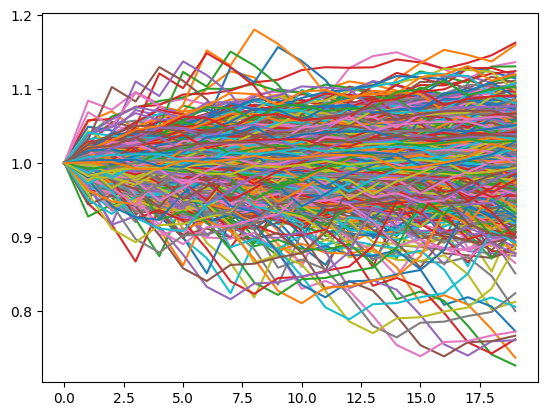

In [128]:
test_data=[]
test_close=[]
test_index=[]

#計測期間
period=20
for i in range(len(df_test)-(period-1)):
    test_data.append(df_test[i:i+period])#20日ごとに分割
    test_close.append(test_data[i]["Close"])
    
    #基準化(最初)
    s=test_close[i][953+i]
    a=test_close[i]/s

    test_index.append(a.values)
    
    #可視化
    plt.plot(test_index[i])
df_test_index=pd.DataFrame(test_index)
df_test_index

In [135]:
test_distance=[]
test_path=[]
for i in range(len(test_index)):
    print(len(test_index)-i)
    for j in range(len(train_index)):
        dist,pa=fastdtw(test_index[i], train_index[j])
        test_distance.append(dist)
        test_path.append(pa)
#listの分割　
def split_list(l, n):
    """
    リストをサブリストに分割する
    :param l: リスト
    :param n: サブリストの要素数
    :return: 
    """
    for i in range(0, len(l), n):
        yield l[i:i + n]
 

test_result = list(split_list(test_distance,len(train_index)))
#DTW行列
test_c=np.array(test_result)
#df_c=pd.DataFrame(c,index=datas,columns=datas)
#df_c.to_csv("dtw.csv",encoding="shift_jis")

1162
1161
1160
1159
1158
1157
1156
1155
1154
1153
1152
1151
1150
1149
1148
1147
1146
1145
1144
1143
1142
1141
1140
1139
1138
1137
1136
1135
1134
1133
1132
1131
1130
1129
1128
1127
1126
1125
1124
1123
1122
1121
1120
1119
1118
1117
1116
1115
1114
1113
1112
1111
1110
1109
1108
1107
1106
1105
1104
1103
1102
1101
1100
1099
1098
1097
1096
1095
1094
1093
1092
1091
1090
1089
1088
1087
1086
1085
1084
1083
1082
1081
1080
1079
1078
1077
1076
1075
1074
1073
1072
1071
1070
1069
1068
1067
1066
1065
1064
1063
1062
1061
1060
1059
1058
1057
1056
1055
1054
1053
1052
1051
1050
1049
1048
1047
1046
1045
1044
1043
1042
1041
1040
1039
1038
1037
1036
1035
1034
1033
1032
1031
1030
1029
1028
1027
1026
1025
1024
1023
1022
1021
1020
1019
1018
1017
1016
1015
1014
1013
1012
1011
1010
1009
1008
1007
1006
1005
1004
1003
1002
1001
1000
999
998
997
996
995
994
993
992
991
990
989
988
987
986
985
984
983
982
981
980
979
978
977
976
975
974
973
972
971
970
969
968
967
966
965
964
963
962
961
960
959
958
957
956
955
954
9

NameError: name 'train_data' is not defined

In [136]:
test_result = list(split_list(test_distance,len(train_index)))
#DTW行列
test_c=np.array(test_result)
#df_c=pd.DataFrame(c,index=datas,columns=datas)
#df_c.to_csv("dtw.csv",encoding="shift_jis")

In [140]:
len(df_test_index)

1162

In [141]:
#距離に基づき過去の株価変動パターンが近い月を順にn個選ぶ→クラスタリング,勾配降下法,動的計画法
#k-medoids法 
test_kmedoid=KMedoids(n_clusters=30, 
                       metric='euclidean', 
                       method='alternate', 
                       init='heuristic', 
                       max_iter=300, 
                       random_state=None).fit(test_c)
#cluster追加
df_test_index["cluster"]=test_kmedoid.labels_
df_test_index.groupby('cluster').count().iloc[:,1]

cluster
0     147
1      38
2       2
3       2
4      21
5       3
6       1
7      20
8       9
9       5
10     18
11      3
12      9
13      2
14      3
15      1
16     15
17     19
18     15
19     69
20     87
21     37
22     74
23     40
24     27
25    149
26     17
27     59
28    109
29    161
Name: 1, dtype: int64

In [142]:
#翌月の月末価格の上昇下落ラベル

#月末終値追加
n=[]
for i in range(len(df_test)-(period-1)):
    n.append(test_data[i]["Close"].tail(1).item())
df_test_index["month_close"]=n
#目的変数Upを追加する(翌日の月末が上がる場合1、それ以外は0とする)
df_test_index['Up']=df_test_index['cluster']
for i in range(len(df_test_index['month_close'])-1):
    if df_test_index['month_close'][i] < df_test_index['month_close'][i+1]:
        df_test_index['Up'][i]="Up"
    else:
        df_test_index['Up'][i]="Down"
#最後は別途        
#if df_train_index['month_close'].tail(1) < df_train['month_close']:
#    df_train_index['Up'][i]="Up"
#else:
#    df_train_index['Up'][i]="Down"

#df = df.drop('delta_Close', axis=1)
#df_test=df_topix_index[["cluster","month_close","Up"]]

/var/folders/0l/19qd9q19187526l0w6zskwwm0000gp/T/ipykernel_92532/3763158203.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test_index['Up'][i]="Down"


In [143]:
df_test_index

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,cluster,month_close,Up
0,1.0,0.996714,0.986202,0.965734,0.958700,0.928647,0.955235,0.931694,0.928978,0.921003,...,0.922473,0.901011,0.927819,0.922122,0.948598,0.968867,0.961826,28,1452.040039,Down
1,1.0,0.989453,0.968918,0.961860,0.931708,0.958384,0.934765,0.932040,0.924039,0.889853,...,0.903982,0.930877,0.925162,0.951725,0.972061,0.964997,0.934579,28,1406.270020,Down
2,1.0,0.979246,0.972113,0.941639,0.968600,0.944729,0.941975,0.933888,0.899338,0.874164,...,0.940800,0.935023,0.961870,0.982423,0.975283,0.944541,0.932814,28,1388.810059,Down
3,1.0,0.992716,0.961597,0.989129,0.964752,0.961939,0.953681,0.918399,0.892691,0.942556,...,0.954840,0.982256,1.003244,0.995953,0.964560,0.952584,0.938976,28,1368.969971,Up
4,1.0,0.968652,0.996386,0.971831,0.968998,0.960679,0.925138,0.899241,0.949472,0.962213,...,0.989463,1.010606,1.003261,0.971637,0.959574,0.945865,0.953770,29,1380.410034,Down
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1157,1.0,1.010664,0.992787,1.000402,1.003564,1.004288,1.004678,0.996085,0.994988,1.006647,...,1.008135,1.010839,1.014092,1.014465,1.012095,0.996295,0.998608,9,1765.209961,Up
1158,1.0,0.982312,0.989846,0.992975,0.993692,0.994078,0.985575,0.984489,0.996026,0.994229,...,1.000173,1.003392,1.003761,1.001416,0.985782,0.988072,0.993143,22,1774.270020,Up
1159,1.0,1.007670,1.010855,1.011585,1.011978,1.003322,1.002217,1.013961,1.012132,1.015437,...,1.021460,1.021836,1.019448,1.003533,1.005863,1.011026,1.018873,19,1788.040039,Up
1160,1.0,1.003161,1.003885,1.004275,0.995685,0.994588,1.006243,1.004428,1.007708,1.012520,...,1.014058,1.011689,0.995895,0.998207,1.003331,1.011118,1.028727,19,1819.180054,Down


In [ ]:

df_test["Pred_Up"]=df_test["Up"]
touti=1

#正解ラベルの付与
    for j in range(30):#クラスタ数回
        if df_test_MinMax_close["cluster"][i]==j:#クラスタ数の特定
        #クラスタ内の上昇（下落）ラベルの多数決
            n=df_topix_tests[df_topix_tests["cluster"]==j]
            n.reset_index(inplace=True)
            n["Time"] = pd.to_datetime(n["index"])
            up=int((n['Up']=="up").sum())#上昇ラベルの総数
            down=int((n["Up"]=="down").sum())#下落ラベルの総数
    if up-down>=touti:#上昇ラベルの方が多い場合
        #df_test_MinMax_close["pred_Up"]=df_test_MinMax_close["cluster"]
        df_test_MinMax_close["pred_Up"][i]="up"
        position=df_test_MinMax_close["month_close"][i]#月末価格で購入
        #m_date=(n["Time"][j]+relativedelta(months=+1)).strftime('%Y-%m-%d')
        #m_date=pd.to_datetime(m_date)
        #df_test_MinMax_close.reset_index(inplace=True)
        #df_test_MinMax_close["Time"] = pd.to_datetime(df_test_MinMax_close.index)
        #n.set_index("index", inplace = True)
        #df_test_MinMax_close["Time"][0]+relativedelta(months=+1)
        #df_train["month_close"][df_train["Time"] [0] +relativedelta(months=+1).fromtimestamp(ts)]
        rikaku=df_test_MinMax_close["month_close"][i+1]#翌月価格
        profit=rikaku-position#翌月価格で売った時の収益
        month_return=(rikaku/position)#リターン％
        return_graph.append(month_return)
        ruiseki_return=(ruiseki_return+month_return)#累積収益率
        print(ruiseki_return)
        #sum=sum+profit#利益の合計
        #print("利益=",sum)
    #s.append(sum)#毎月の利益
    elif up-down>=touti:
        #df_test_MinMax_close["pred_Up"]=df_test_MinMax_close["cluster"]
        df_test_MinMax_close["pred_Up"][i]="down"
        position=df_test_MinMax_close["month_close"][i]#月末価格で売却
        #df_test_MinMax_close["Time"] = pd.to_datetime(df_test_MinMax_close.index
        rikaku=df_test_MinMax_close["month_close"][i+1]#翌月価格
        profit=position-rikaku#翌月価格で買った時の収益
        month_return=(rikaku/position)#リターン％
        return_graph.append(month_return)
        ruiseki_return=(ruiseki_return+month_return)#累積収益率
        print(ruiseki_return)
    #ruiseki_return=(1+month_return).cumprod()#累積収益率
    #sum=sum+profit#利益の合計
    #print("利益=",sum)
#s.append(sum)

#結果
acc=0
bunbo=0
for i in range(60):
    if df_test_MinMax_close["pred_Up"][i]=="up" or df_test_MinMax_close["pred_Up"][i]=="down":
        bunbo=bunbo+1
        if df_test_MinMax_close["pred_Up"][i]==df_test_MinMax_close["Up"][i]:
            acc=acc+1
print("累積収益率：",100+ruiseki_return,"%")
print("正解率：",(acc/bunbo)*100,"%")

: 

In [ ]:
bunbo

: 

In [ ]:
acc=0
bunbo=0
for i in range(60):
    if df_test_MinMax_close["pred_Up"][i]=="up" or df_test_MinMax_close["pred_Up"][i]=="down":
        bunbo=bunbo+1
        if df_test_MinMax_close["pred_Up"][i]==df_test_MinMax_close["Up"][i]:
            acc=acc+1
print("累積収益率：",100+ruiseki_return,"%")
print("正解率：",(acc/bunbo)*100,"%")

: 

In [ ]:
plt.plot(return_graph)

: 

In [ ]:
#変動率
#テクニカル指標
#月、週、日単位の平均、標準偏差
#移動平均線のパターン分析
#トレンド・季節性・周期性・不規則性→不規則性を削除もしくは不規則性のトレンドのみに適用

: 

In [ ]:
# 終値の前日比の追加
df_shift = df.shift(1)

df['Close_ratio'] = (df['Close'] - df_shift['Close']) / df_shift['Close']
df

# 始値と終値の差分を追加
df['Body'] = df['Open'] - df['Close']
df

: 

## 検証データによる予測と精度検証

In [ ]:
#参考文献
k-medoids
#https://python-kmedoids.readthedocs.io/en/latest/

: 